In [2]:
import os
import sys
import numpy as np
import pandas as pd
import scipy.io

import PIL
import matplotlib.pyplot as plt

things_stim_path = '/user_data/mmhender/stimuli/things/'
ecoset_path = '/lab_data/tarrlab/common/datasets/Ecoset/'
ecoset_info_path = '/user_data/mmhender/stimuli/ecoset_info/'


In [43]:
class a:
    def __init__():
        return a
        
args = a
args.lr = 1.0
args.max_iter = 20
args.checkpoint_every = 1
args.debug=False
if args.debug:
    args.n_steps = 1
args.rndseed = None

In [46]:
args.debug

False

In [34]:
labs = np.random.choice(np.arange(10), 1000)

In [35]:
n_cv = 6;

In [36]:
cv_labs = np.zeros_like(labs)
unvals, counts = np.unique(labs, return_counts=True)

for uu in unvals:
    
    inds = np.where(labs==uu)[0]
    
    cv_tmp = np.tile(np.arange(n_cv), [int(np.ceil(len(inds)/n_cv)),])
    cv_tmp = cv_tmp[np.random.permutation(len(cv_tmp))][0:len(inds)]
    cv_labs[inds] = cv_tmp

In [37]:
unvals, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([104,  97, 111,  93,  89,  95, 120, 103,  92,  96]))

In [39]:
for cv in np.unique(cv_labs):
    
    print(cv)
    
    print(np.unique(labs[cv_labs==cv], return_counts=True))

0
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([16, 16, 19, 15, 14, 16, 20, 17, 16, 16]))
1
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([17, 16, 19, 16, 15, 16, 20, 18, 15, 16]))
2
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([18, 17, 18, 15, 15, 16, 20, 16, 14, 16]))
3
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([18, 16, 18, 15, 15, 16, 20, 17, 16, 16]))
4
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([17, 15, 18, 16, 15, 15, 20, 17, 16, 16]))
5
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([18, 17, 19, 16, 15, 16, 20, 18, 15, 16]))


In [14]:
cv_tmp

array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5])

In [3]:
sys.path.append('/user_data/mmhender/featsynth/code/')
from prep_images import proc_ecoset_categs
proc_ecoset_categs.choose_ecoset_categs()

0 insect
['beetle' 'bee' 'butterfly' 'grasshopper' 'caterpillar' 'ant' 'moth'
 'wasp']
[4288 4105 4035 3766 3702 3572 3191 2895]
1 vegetable
['pea' 'corn' 'pumpkin' 'onion' 'cabbage' 'lettuce' 'beet' 'radish']
[3490 3296 3118 3101 3073 3039 2566 2251]
2 fruit
['melon' 'grape' 'cherry' 'raspberry' 'apple' 'pear' 'banana'
 'pomegranate']
[3171 3169 2989 2781 2726 2674 2645 2307]
3 dessert
['chocolate' 'cake' 'pudding' 'muffin' 'pastry' 'cupcake' 'cookie' 'pie']
[3457 3237 3135 3028 2096 1068  947  896]
4 tool
['pencil' 'knife' 'axe' 'razor' 'broom' 'hammer' 'shovel' 'spoon']
[3116 2966 2647 2392 2307 2041 1936 1816]
5 musical instrument
['bell' 'guitar' 'piano' 'drum' 'violin' 'clarinet' 'ukulele' 'kazoo']
[3943 3651 3375 3256 2883 1442 1267  532]
6 furniture
['table' 'bench' 'couch' 'bed' 'chair' 'crib' 'closet' 'hammock']
[4028 3808 3708 3365 3114 2068 2021  744]
7 vehicle
['ship' 'train' 'airplane' 'truck' 'car' 'bus' 'motorcycle' 'canoe']
[4051 3998 3867 3758 3650 3557 3333 2885]
sav

In [12]:
# load names of all categories in ecoset dataset
ecoset_folders = np.load(os.path.join(ecoset_info_path, 'ecoset_names.npy'), \
                         allow_pickle=True).item()

superord_use, basic_names_each = proc_ecoset_categs.choose_ecoset_categs_step1()

counts_each = np.array([len(bnames) for bnames in basic_names_each])

# going to randomly subsample 8 basic from each superord
n_basic_min = 8;
assert(np.all(counts_each>=n_basic_min))

# list of all files in each category
fn = os.path.join(ecoset_info_path, 'ecoset_file_info.npy')
efiles = np.load(fn, allow_pickle=True).item()

basic_names_subsample = []
for si in range(len(superord_use)):
    basic_counts = np.array([efiles[bname]['good_ims'] for bname in basic_names_each[si]])
    print(si, superord_use[si])
    print(basic_names_each[si])
    print(basic_counts)
    inds_use = np.flipud(np.argsort(basic_counts))[0:n_basic_min]
    bnames_use = np.array(basic_names_each[si])[inds_use]
    print(bnames_use)
    print(basic_counts[inds_use])
    basic_names_subsample += [bnames_use]

0 insect
['ant' 'bee' 'beetle' 'butterfly' 'caterpillar' 'cockroach' 'dragonfly'
 'grasshopper' 'mosquito' 'moth' 'wasp']
[3572 4105 4288 4035 3702 1696 1915 3766 2014 3191 2895]
['beetle' 'bee' 'butterfly' 'grasshopper' 'caterpillar' 'ant' 'moth'
 'wasp']
[4288 4105 4035 3766 3702 3572 3191 2895]
1 vegetable
['artichoke' 'asparagus' 'beet' 'broccoli' 'cabbage' 'carrot'
 'cauliflower' 'celery' 'corn' 'cucumber' 'eggplant' 'garlic' 'kale'
 'leek' 'lettuce' 'onion' 'parsley' 'pea' 'potato' 'pumpkin' 'radish'
 'rhubarb' 'scallion' 'spinach' 'zucchini']
[1717 2239 2566 1940 3073 2041 2021  925 3296 1347 1917 1536 1672  817
 3039 3101 2002 3490  992 3118 2251 1360 1349 1321 1233]
['pea' 'corn' 'pumpkin' 'onion' 'cabbage' 'lettuce' 'beet' 'radish']
[3490 3296 3118 3101 3073 3039 2566 2251]
2 fruit
['apple' 'banana' 'blackberry' 'blueberry' 'cherry' 'coconut' 'cranberry'
 'fig' 'grape' 'grapefruit' 'lemon' 'lime' 'mango' 'melon' 'papaya'
 'peach' 'pear' 'pineapple' 'plum' 'pomegranate' 'raspb

In [9]:
np.array(basic_names_each)

/home/mmhender/imstat_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([array(['ant', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
              'dragonfly', 'grasshopper', 'mosquito', 'moth', 'wasp'],
             dtype=object)                                                    ,
       array(['artichoke', 'asparagus', 'beet', 'broccoli', 'cabbage', 'carrot',
              'cauliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'garlic',
              'kale', 'leek', 'lettuce', 'onion', 'parsley', 'pea', 'potato',
              'pumpkin', 'radish', 'rhubarb', 'scallion', 'spinach', 'zucchini'],
             dtype=object)                                                       ,
       array(['apple', 'banana', 'blackberry', 'blueberry', 'cherry', 'coconut',
              'cranberry', 'fig', 'grape', 'grapefruit', 'lemon', 'lime',
              'mango', 'melon', 'papaya', 'peach', 'pear', 'pineapple', 'plum',
              'pomegranate', 'raspberry', 'strawberry'], dtype=object)          ,
       array(['brownie', 'cake', 'chocolate', 'c

In [8]:
np.argsort(basic_counts)

array([ 5,  6,  8, 10,  9,  0,  4,  7,  3,  1,  2])

In [ ]:
# rndseed = 243535
# np.random.seed(rndseed)

#     basic_names_subsample = [np.random.choice(bnames, n_basic_min, replace=False) \
#                              for bnames in basic_names_each]

# organize into dict for saving
sinfo = dict()
binfo = dict()
for si, sname in enumerate(superord_use):
    sinfo[sname] = dict()
    sinfo[sname]['super_name'] = sname
    sinfo[sname]['basic_names'] = basic_names_subsample[si]
    for bi, bname in enumerate(basic_names_subsample[si]):
        binfo[bname] = dict()
        binfo[bname]['basic_name'] = bname
        binfo[bname]['super_name'] = sname
        binfo[bname]['ecoset_folder'] = ecoset_folders[bname]

# save
fn2save = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
print('saving to %s'%fn2save)
np.save(fn2save, {'binfo': binfo, 'sinfo': sinfo})

In [2]:
sys.path.append('/user_data/mmhender/featsynth/code/')
from prep_images import proc_ecoset_categs

proc_ecoset_categs.choose_ecoset_categs()

0 insect
['ant' 'bee' 'beetle' 'butterfly' 'caterpillar' 'cockroach' 'dragonfly'
 'grasshopper' 'mosquito' 'moth' 'wasp']
[3572, 4105, 4288, 4035, 3702, 1696, 1915, 3766, 2014, 3191, 2895]


/user_data/mmhender/featsynth/code/prep_images/proc_ecoset_categs.py:123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bnames_use = np.array(basic_names_each)[np.argsort(basic_counts)[0:n_basic_min]]


IndexError: index 8 is out of bounds for axis 0 with size 8

In [2]:
fn = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
info = np.load(fn, allow_pickle=True).item()
bnames = np.array(list(info['binfo'].keys()))

In [13]:
len(enames.keys())

565

In [3]:
bnames

array(['mosquito', 'caterpillar', 'ant', 'bee', 'moth', 'beetle',
       'butterfly', 'wasp', 'broccoli', 'onion', 'spinach', 'eggplant',
       'garlic', 'kale', 'parsley', 'radish', 'coconut', 'raspberry',
       'apple', 'fig', 'peach', 'lemon', 'banana', 'mango', 'milkshake',
       'pie', 'muffin', 'chocolate', 'brownie', 'pudding', 'cookie',
       'pastry', 'flyswatter', 'paintbrush', 'ruler', 'blowtorch',
       'eggbeater', 'hammer', 'spoon', 'screwdriver', 'drum', 'bell',
       'guitar', 'clarinet', 'kazoo', 'ukulele', 'violin', 'piano',
       'table', 'bench', 'crib', 'hammock', 'closet', 'chair', 'bed',
       'couch', 'tractor', 'bus', 'snowplow', 'hovercraft', 'ship',
       'boat', 'gondola', 'wheelchair'], dtype='<U11')

In [5]:
fn = os.path.join(ecoset_info_path, 'ecoset_file_info.npy')
efiles = np.load(fn, allow_pickle=True).item()

In [8]:
enames = np.load(os.path.join(ecoset_info_path, 'ecoset_names.npy'), allow_pickle=True).item()
enames

{'burner': '1704_burner',
 'toothpick': '0675_toothpick',
 'tapioca': '2651_tapioca',
 'granola': '1255_granola',
 'zucchini': '1088_zucchini',
 'hammer': '1543_hammer',
 'stairs': '0114_stairs',
 'fireworks': '1073_fireworks',
 'flea': '0909_flea',
 'popcorn': '0177_popcorn',
 'pudding': '0810_pudding',
 'grate': '1427_grate',
 'frog': '0164_frog',
 'hamster': '1135_hamster',
 'beet': '1563_beet',
 'honeycomb': '2092_honeycomb',
 'elevator': '1231_elevator',
 'anthill': '0969_anthill',
 'mop': '0380_mop',
 'ashtray': '0389_ashtray',
 'banana': '0170_banana',
 'barrel': '1010_barrel',
 'turnip': '1592_turnip',
 'baguette': '2671_baguette',
 'cockroach': '0463_cockroach',
 'mountain': '0124_mountain',
 'fern': '0232_fern',
 'wire': '1593_wire',
 'moose': '0369_moose',
 'sundial': '2089_sundial',
 'microphone': '0959_microphone',
 'antenna': '1889_antenna',
 'weasel': '1905_weasel',
 'bowl': '0739_bowl',
 'shrimp': '1424_shrimp',
 'carrot': '0224_carrot',
 'earpiece': '1634_earpiece',
 '

In [9]:
# load the list of all concepts (basic-level) in THINGS dataset
filename = os.path.join(things_stim_path,'things_concepts.tsv')
df = pd.read_csv(filename, sep='\t')
things_names = np.array(df['Word'])

# load names of all categories (superord) in THINGS dataset
info_folder = os.path.join(things_stim_path,'27 higher-level categories')
categ_names = scipy.io.loadmat(os.path.join(info_folder, 'categories.mat'))['categories'][0]
categ_names = np.array([categ_names[ii][0] for ii in range(len(categ_names))])

# correspondence between things concepts (basic) and categories (superord)
# this matrix goes [basic x super]
dat = scipy.io.loadmat(os.path.join(info_folder, 'category_mat_manual.mat'))
cmat = dat['category_mat_manual']
cmat_use = cmat==1


# make a list of names to skip...

# skip any that are the same name as superordinate, because that won't make sense
things_inds_skip = np.isin(things_names, categ_names) 

# removing any duplicate concept names here (these are ambiguous meaning words like bat)
un, counts = np.unique(things_names, return_counts=True)
duplicate_conc = un[counts>1]
duplicate_conc_inds = [conc in duplicate_conc for conc in things_names]
things_inds_skip = things_inds_skip | duplicate_conc_inds

# skip some other ones that I found confusing/uncommon 
#(cheese was included as dessert, avocado was fruit)
conc_skip = ['earwig', 'cheese', 'mandolin', 'avocado', 'anvil', 'okra']
things_inds_skip = things_inds_skip | np.isin(things_names, conc_skip)

things_names_skip = things_names[things_inds_skip]

# load names of all categories in ecoset dataset
ecoset_folders = np.load(os.path.join(ecoset_info_path, 'ecoset_names.npy'), \
                         allow_pickle=True).item()
ecoset_names = np.array(list(ecoset_folders.keys()))

# get overlap
is_in_ecoset = [np.any([(t==e) for e in ecoset_names]) for t in things_names]


# this is the list of 8 superord categories to use here
# chosen based on which ones had at least 8 basic-level members in ecoset, 
# and also trying to minimize overlap between categories. 
superord_use = ['insect','vegetable','fruit','dessert', \
             'tool','musical instrument','furniture', 'vehicle']
superord_inds_use = np.array([np.where(categ_names==superord)[0][0] for superord in superord_use])

# going to exclude any basic-level that occur in multiple superord categ
used_once = np.sum(cmat_use[:,superord_inds_use], axis=1)==1

inds_each = [(cmat_use[:,ci] & is_in_ecoset & ~things_inds_skip & used_once) \
                        for ci in superord_inds_use]

counts_each = np.array([np.sum(inds) for inds in inds_each])

basic_names_each = [things_names[inds] for inds in inds_each]

# going to randomly subsample 8 basic from each superord
n_basic_min = 8;
assert(np.all(counts_each>=n_basic_min))

rndseed = 243535
np.random.seed(rndseed)

In [11]:
basic_names_each

[array(['ant', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
        'dragonfly', 'grasshopper', 'mosquito', 'moth', 'wasp'],
       dtype=object),
 array(['artichoke', 'asparagus', 'beet', 'broccoli', 'cabbage', 'carrot',
        'cauliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'garlic',
        'kale', 'leek', 'lettuce', 'onion', 'parsley', 'pea', 'potato',
        'pumpkin', 'radish', 'rhubarb', 'scallion', 'spinach', 'zucchini'],
       dtype=object),
 array(['apple', 'banana', 'blackberry', 'blueberry', 'cherry', 'coconut',
        'cranberry', 'fig', 'grape', 'grapefruit', 'lemon', 'lime',
        'mango', 'melon', 'papaya', 'peach', 'pear', 'pineapple', 'plum',
        'pomegranate', 'raspberry', 'strawberry'], dtype=object),
 array(['brownie', 'cake', 'chocolate', 'cookie', 'cupcake', 'milkshake',
        'muffin', 'pastry', 'pie', 'pudding'], dtype=object),
 array(['axe', 'blowtorch', 'broom', 'corkscrew', 'crowbar', 'dustpan',
        'eggbeater', 'flyswat

In [ ]:
basic_names_subsample = [np.random.choice(bnames, n_basic_min, replace=False) \
                         for bnames in basic_names_each]

# organize into dict for saving
sinfo = dict()
binfo = dict()
for si, sname in enumerate(superord_use):
    sinfo[sname] = dict()
    sinfo[sname]['super_name'] = sname
    sinfo[sname]['basic_names'] = basic_names_subsample[si]
    for bi, bname in enumerate(basic_names_subsample[si]):
        binfo[bname] = dict()
        binfo[bname]['basic_name'] = bname
        binfo[bname]['super_name'] = sname
        binfo[bname]['ecoset_folder'] = ecoset_folders[bname]

# save
fn2save = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
print('saving to %s'%fn2save)
np.save(fn2save, {'binfo': binfo, 'sinfo': sinfo})

In [6]:
efiles

{'mosquito': {'train': {'images': ['n02201000_990.JPEG',
    'n02201626_64.JPEG',
    'n02200850_3257.JPEG',
    'n02200198_4951.JPEG',
    'n02202006_3546.JPEG',
    'n02200198_6900.JPEG',
    'n02200850_6267.JPEG',
    'n02200198_12959.JPEG',
    'n02200850_5143.JPEG',
    'n02202006_2887.JPEG',
    'n02200198_1556.JPEG',
    'n02200198_3463.JPEG',
    'n02202006_7603.JPEG',
    'n02202006_4874.JPEG',
    'n02201000_5231.JPEG',
    'n02201626_1200.JPEG',
    'n02202006_3971.JPEG',
    'n02200198_6537.JPEG',
    'n02200850_88.JPEG',
    'n02200198_13498.JPEG',
    'n02200198_10063.JPEG',
    'n02201626_350.JPEG',
    'n02200850_970.JPEG',
    'n02202006_99.JPEG',
    'n02201626_1638.JPEG',
    'n02201000_5609.JPEG',
    'n02200198_762.JPEG',
    'n02200198_2365.JPEG',
    'n02201626_1594.JPEG',
    'n02200850_3588.JPEG',
    'n02200198_13347.JPEG',
    'n02200198_729.JPEG',
    'n02201000_2747.JPEG',
    'n02201000_1854.JPEG',
    'n02201000_1428.JPEG',
    'n02200198_3010.JPEG',
    

In [8]:
efiles['mosquito']['test'].keys()

dict_keys(['images', 'size', 'mode'])

In [13]:
len(efiles['mosquito']['train']['mode'])

3594

In [15]:
bi = 0;
bname = bnames[bi]
bname

'mosquito'

In [25]:
thresh = 300

sizes = efiles[bname]['train']['size']

abv_thresh = np.array([(s1>=thresh) & (s2>=thresh) for s1, s2 in sizes])
is_rgb = np.array(efiles[bname]['train']['mode'])=='RGB'

ims_use = abv_thresh & is_rgb

np.mean(ims_use)

0.48553144129104064

In [29]:
im_files_use = np.array(efiles[bname]['train']['images'])[ims_use]

In [23]:
efiles[bname]['train']['mode']=='RGB'

False

In [43]:
efiles = dict()
efiles[bname] = dict()
efiles[bname]['train'] = dict()
efiles[bname]['train']['images'] = os.listdir(os.path.join(ecoset_path, 'train', info['binfo'][bname]['ecoset_folder']))
seed = 324354 + bi
efiles[bname]['seed'] = seed

In [7]:
efiles[bname]['train']['sizes'] = [[] for ii in range(len(efiles[bname]['train']['images']))]

for ii, imfile in enumerate(efiles[bname]['train']['images']):
    imfn = os.path.join(os.path.join(ecoset_path, 'train', info['binfo'][bname]['ecoset_folder'], imfile))
    im = PIL.Image.open(imfn)
    efiles[bname]['train']['sizes'][ii] = im.size

NameError: name 'efiles' is not defined

In [6]:
im

NameError: name 'im' is not defined

0.7931469413495901

In [32]:
np.random.seed(seed)
ims_use = np.random.choice(efiles[bname]['all_train'], 100, replace=False)
# ims_use

In [34]:
inds_remove = [6]
ims_remove = ims_use[inds_remove]
ims_use = ims_use[~np.isin(ims_use, ims_remove)]
len(ims_use)

99

In [35]:
remaining_images = np.array(efiles[bname]['all_train'])[~np.isin(efiles[bname]['all_train'], ims_use)]
n_removed = len(ims_remove)
ims_use  = np.array(list(ims_use) + list(np.random.choice(remaining_images, n_removed)))
len(ims_use)

100

In [36]:
efiles[bname]['good_100'] = ims_use

In [37]:
print('saving to %s'%fn2save)
np.save(fn2save, efiles)

saving to /user_data/mmhender/stimuli/ecoset_info/ims_use_expt3/ant.npy


In [38]:
np.load(fn2save, allow_pickle=True).item()[bname].keys()

dict_keys(['all_train', 'seed', 'good_100'])

(210, 185)
(500, 375)
(300, 270)
(372, 500)
(500, 375)
(234, 234)
(1057, 580)
(500, 375)
(371, 254)
(500, 407)
(500, 333)
(500, 333)
(433, 500)
(500, 334)
(500, 375)
(500, 325)
(324, 205)
(500, 375)
(1141, 823)
(400, 245)
(500, 500)
(500, 308)
(414, 500)
(500, 352)
(538, 444)
(500, 309)
(216, 192)
(277, 146)
(500, 382)
(1024, 768)
(600, 539)
(560, 604)
(500, 334)
(500, 334)
(83, 61)
(500, 339)
(600, 442)
(738, 607)
(2816, 2112)
(150, 149)
(200, 140)
(500, 333)
(500, 333)
(500, 333)
(500, 333)
(500, 441)
(289, 178)
(500, 375)
(600, 398)
(150, 100)
(500, 447)
(200, 272)
(200, 133)
(500, 500)
(500, 386)
(500, 375)
(500, 333)
(160, 90)
(385, 255)
(450, 256)
(500, 332)
(500, 333)
(1280, 960)
(165, 109)
(200, 150)
(1000, 716)
(240, 161)
(500, 375)
(500, 328)
(500, 333)
(360, 240)
(333, 500)
(200, 145)
(233, 161)
(240, 360)
(500, 333)
(500, 333)
(498, 500)
(500, 375)
(500, 333)
(240, 180)
(500, 323)
(640, 427)
(500, 375)
(500, 398)
(103, 82)
(500, 376)
(430, 500)
(142, 95)
(500, 307)
(500, 31

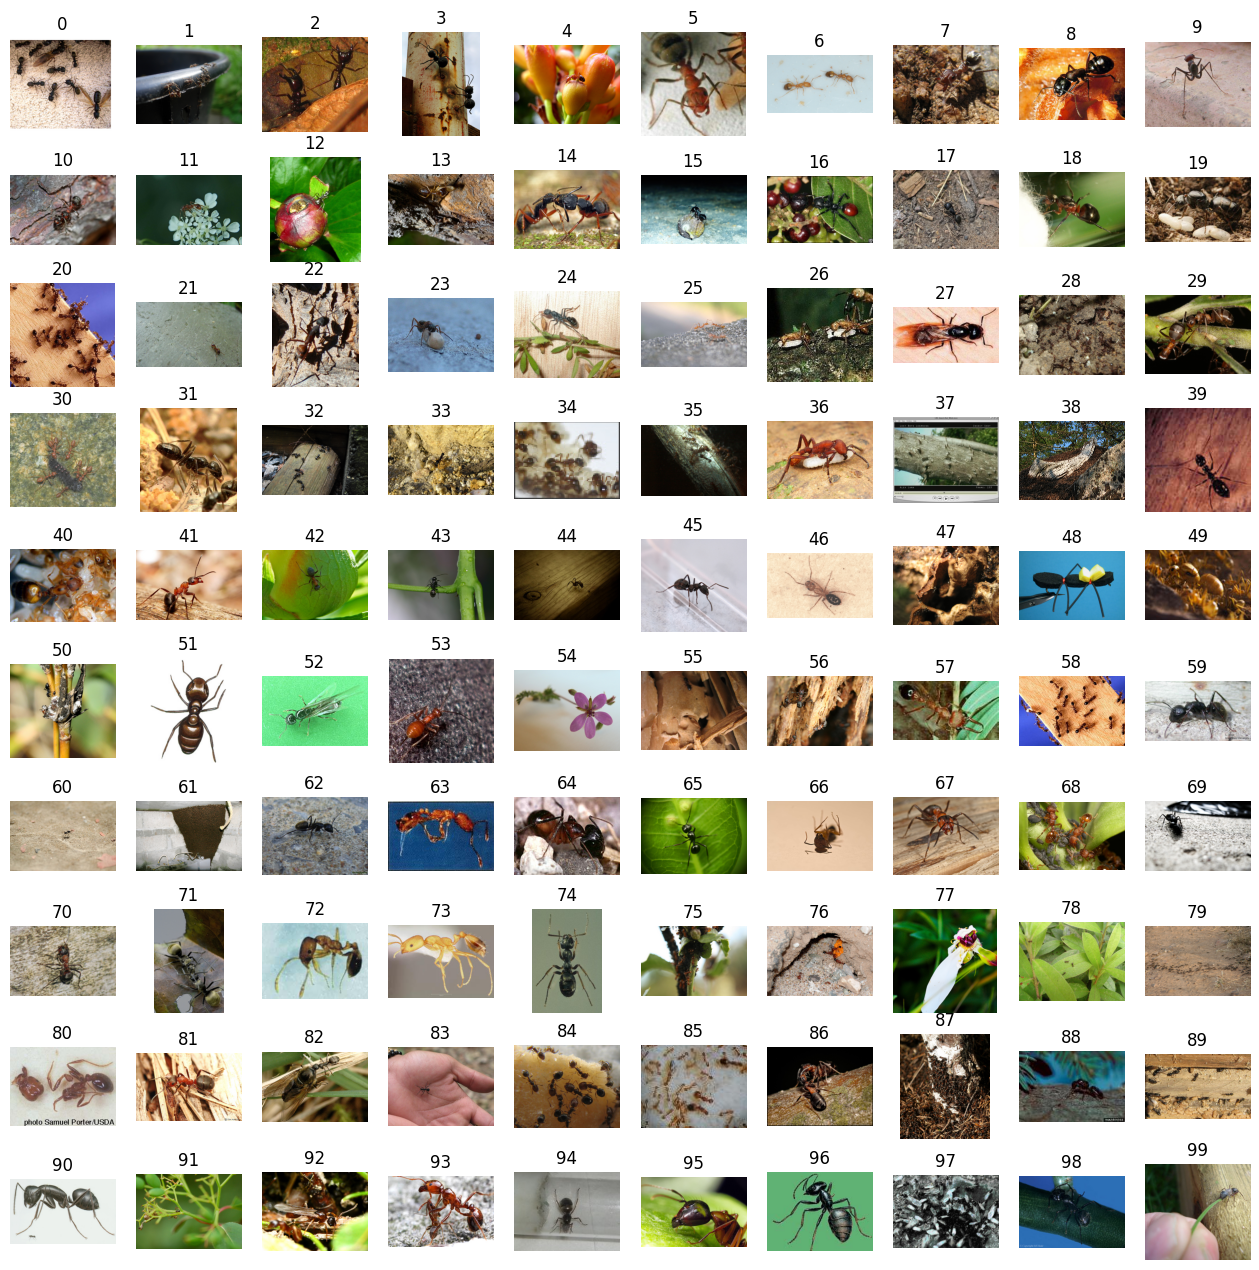

In [40]:
plt.figure(figsize=(16,16))
  
for ii, imfile in enumerate(ims_use):
    
    imfn = os.path.join(os.path.join(ecoset_path, 'train', info['binfo'][bname]['ecoset_folder'], imfile))

    im = PIL.Image.open(imfn)
    
    print(im.size)

    plt.subplot(10,10,ii+1)
    plt.imshow(im)
    plt.title(ii)
    plt.axis('off')

